In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Laser settings

Pattern, where the laser is permanently on and writes rows with a high level of overlap.

$$s=v*t \Leftrightarrow t = \frac{s}{v}$$ 
$$ s= a*t^2 \Leftrightarrow t = \sqrt{\frac{s}{a}}$$ where $s=a*t$, therefore $a = \frac{v^2}{s}$



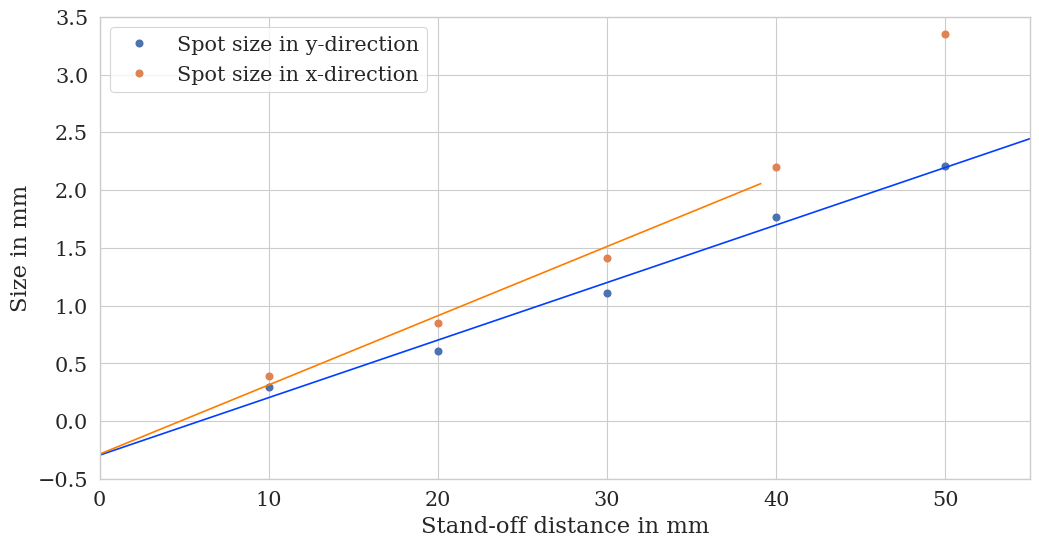

In [14]:
distances = [10, 20, 30, 40, 50]
x_width = [0.3, 0.61, 1.11, 1.77, 2.21]
y_width = [0.39, 0.85, 1.41, 2.2, 3.35]



x = np.array(distances).reshape(-1, 1)
x_fine = np.linspace(-30, 60, 100).reshape(-1, 1)
x_width = np.array(x_width).reshape(-1, 1)
y_width = np.array(y_width).reshape(-1, 1)

model_x = LinearRegression()
model_x.fit(x, x_width)
y_pred_x = model_x.predict(x_fine)

model_y = LinearRegression()
model_y.fit(x, y_width)
y_pred_y = model_y.predict(x_fine)

model_y2 = LinearRegression()
model_y2.fit(x[:-1], y_width[:-1])
x_fine_2 = x_fine[x_fine<40].reshape(-1, 1)
y_pred_y2 = model_y2.predict(x_fine_2)

model_y3 = LinearRegression()
model_y3.fit(x[:-2], y_width[:-2])
x_fine_3 = x_fine[x_fine<30].reshape(-1, 1)
y_pred_y3 = model_y3.predict(x_fine_3)


sns.set_theme("paper", font_scale=1.7, style="whitegrid", font="serif")
pal = sns.color_palette("deep")
pal2 = sns.color_palette("bright")
fig, axs = plt.subplots(1, 1, figsize=(12, 6))
axs.plot(x, x_width, 'o', color=pal[0])
axs.plot(x, y_width, 'o', color=pal[1])
axs.plot(x_fine, y_pred_x, color=pal2[0])
axs.plot(x_fine_2, y_pred_y2, color=pal2[1])
axs.set_xlabel("Stand-off distance in mm")
axs.set_ylabel("Size in mm")
axs.set_xlim([0, 55])
axs.set_ylim([-0.5, 3.5])
axs.legend(["Spot size in y-direction", "Spot size in x-direction"])
plt.savefig("../../05_Thesis/figures/Methods/spotsize.pdf")